**Aquí voy a probar todas las funcionalidades necesarias para hacer la librería de funciones que voy a ir reutilizando.  
Va a tener las siguientes partes:**  
1. Utils:   
    1. **Datos**: Funcionalidad de carga de datos, además de seleciones que no modifique los datos.
    2. **Preprocess**: Cosas como normalizacion, o algunas formas de reordenar u obtener transformaciones de los datos.  
    3. **PostProcess**: Para la parte de manejar los resultados.   
    4. **Vizutils**: Es una forma de crear representaciones sobre los datos finales o los inciales.   

2. **Models**:  Toda la parte de modelos, tanto para DNN, como las variantes de PINNs y GNN...  Añadir la opcion de selfadaptative weight en la loss.
3. **Train**: Utilidades que hacen el entrenamiento y tal. No creo que haya mucha complegidad aquí.

In [1]:
import os 
BASE_DIR=os.path.abspath("../../")

In [2]:
import sys 
sys.path.append(BASE_DIR)
DATA_DIR="/home/arturo/Documents/programacion_stuff/DeepElasticity/data/001-LinearElasticity"

In [3]:
from src.utils.data import Data
from src.models import PINN  
from src.train import Trainer
import torch 
import matplotlib.pyplot as plt 

In [4]:
data=Data("MULTIPLE_E_VALUES_NEW",10,E="0.005",base_dir=DATA_DIR)


In [5]:
data.load_data()

In [6]:
train_init_pos_main,train_disp_main,test_init_pos_main,test_disp_main,position_selected_stresses,return_stress,return_colloc_points=data.prepare_pytorch_data()

In [7]:
init_values={"nu":.4,"alpha":1.1,"E_ref":0.05}
pinn=PINN([3,80,80,80,80,80,80,3],init_values,loss_weights_init={"data":None,"PDE":None,"BC":1})

/home/arturo/Documents/programacion_stuff/DeepElasticity/src/models.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.E = torch.tensor((1+self.alpha)*self.E_ref,dtype=torch.float32).to(self.device)


In [8]:
pinn.w_BC

1

In [9]:
for i in pinn.parameters():
    print(i)

Parameter containing:
tensor(1.1000, device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.8231], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-6.3357e-03, -1.2779e-01,  5.4779e-03],
        [-2.5332e-02, -9.3053e-02, -9.4184e-02],
        [-2.3532e-02,  2.8428e-02,  1.6846e-01],
        [ 1.3229e-01,  5.6938e-02,  9.3983e-02],
        [ 2.6337e-01, -1.7763e-01, -1.8935e-01],
        [ 7.1802e-02, -1.0114e-01,  4.0618e-02],
        [ 5.3307e-02, -1.6140e-01, -8.6088e-03],
        [ 1.2624e-01, -4.6832e-02,  1.9449e-02],
        [ 2.4242e-01, -1.0170e-01,  1.5459e-01],
        [-2.2163e-02, -1.6726e-01, -4.6744e-03],
        [-1.9375e-03,  7.1051e-02,  1.2195e-01],
        [ 4.8398e-02,  4.8623e-01,  1.8268e-01],
        [-2.4130e-01,  1.1040e-01,  1.0681e-01],
        [ 3.4325e-02,  1.9178e-02,  7.8387e-02],
        [-1.5256e-01, -3.8759e-02,  2.7548e-01],
        [-1.3340e-01, -1.7407e-01,  1.5197e-01],
        [-2.8466e-01,  1.2432e-01,  2.2324e-

In [10]:
# opt=torch.optim.Adam(pinn.parameters(),lr=1e-3)
# for epoch in range(700):
#     loss=pinn.loss(train_init_pos_main,train_disp_main,return_colloc_points,position_selected_stresses,return_stress)
#     print("Epoch: ", epoch, "loss: ", loss.item())
#     loss.backward()
#     opt.step()
#     opt.zero_grad()

In [11]:
init_values={"nu":.4,"alpha":1.1,"E_ref":0.05}
pinn=PINN([3,80,80,80,80,80,80,3],init_values,loss_weights_init={"data":None,"PDE":None,"BC":None})
step_dict = {
    "step_1": {"optim": torch.optim.Adam(pinn.parameters(), lr=1e-3), 
               "epochs": 17000}
    }

In [12]:
trainer=Trainer(step_dict)

In [13]:
trainer.train(pinn,data)

TypeError: cannot assign 'torch.cuda.FloatTensor' as parameter 'w_data' (torch.nn.Parameter or None expected)

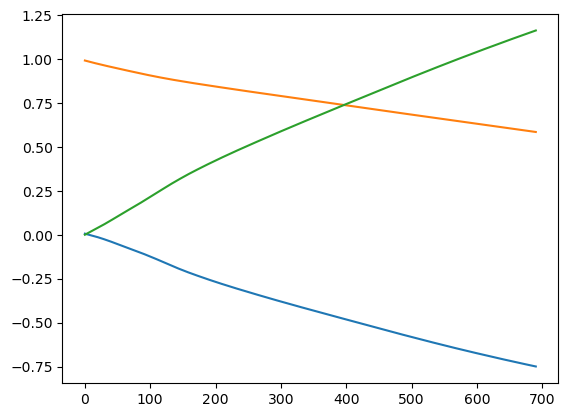

In [ ]:
plt.plot(pinn.params_history["w_PDE"])
plt.plot(pinn.params_history["w_data"])
plt.plot(pinn.params_history["w_BC"])



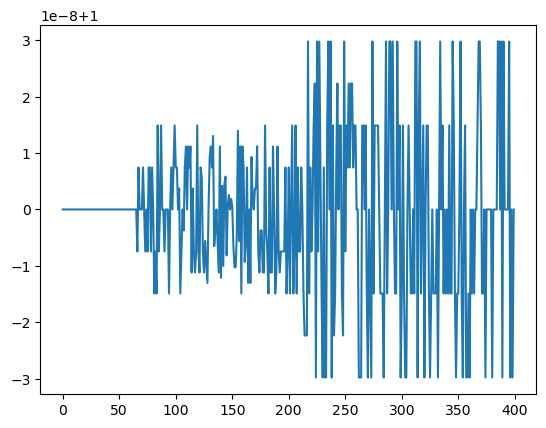

In [ ]:
import numpy as np
plt.plot(np.array(pinn.params_history["w_BC"])+np.array(pinn.params_history["w_PDE"])+np.array(pinn.params_history["w_data"]))